In [ ]:
# TEST - Generate a ER network
import networkx as nx

def generate_er_network(num_nodes, edge_probability):
    G = nx.erdos_renyi_graph(num_nodes, edge_probability)
    return G

# Example usage
num_nodes = 10  # Number of nodes in the network
edge_probability = 0.2  # Probability of an edge between any two nodes
er_network = generate_er_network(num_nodes, edge_probability)
print(er_network.edges())

[(0, 1), (0, 3), (0, 8), (0, 9), (1, 5), (2, 5), (3, 4), (6, 9)]


[(0, 4), (1, 3), (1, 6), (4, 6), (4, 8), (4, 9), (6, 8), (6, 9), (7, 9), (8, 9)]


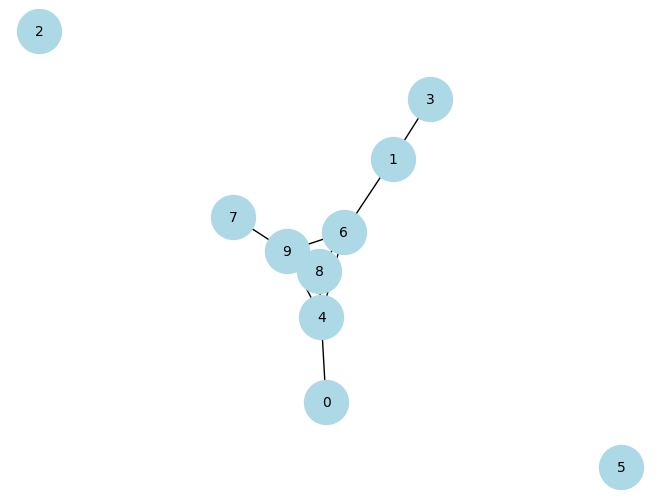

In [ ]:
# TEST - generate and graph a ER network

import networkx as nx
import matplotlib.pyplot as plt

def generate_er_network(num_nodes, edge_probability):
    G = nx.erdos_renyi_graph(num_nodes, edge_probability)
    return G

def plot_er_network(G):
    nx.draw(G, with_labels=True, node_color='lightblue', node_size=1000, font_size=10)
    plt.show()

# Example usage
num_nodes = 10  # Number of nodes in the network
edge_probability = 0.2  # Probability of an edge between any two nodes
er_network = generate_er_network(num_nodes, edge_probability)

print(er_network.edges)
plot_er_network(er_network)


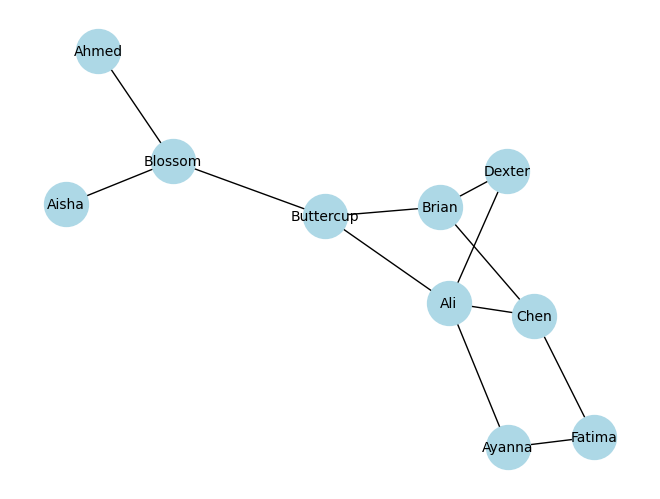

In [ ]:
# generate and graph an ER Network and assign names to nodes from a file

import networkx as nx
import matplotlib.pyplot as plt

def generate_er_network(num_nodes, edge_probability, names):
    G = nx.erdos_renyi_graph(num_nodes, edge_probability)
    node_mapping = {i: name for i, name in enumerate(names)}
    G = nx.relabel_nodes(G, node_mapping)
    return G

def read_names_from_file(file_path):
    with open(file_path, 'r') as file:
        names = [name.rstrip('\n') for name in file.readlines()]
    return names

def plot_er_network(G):
    nx.draw(G, with_labels=True, node_color='lightblue', node_size=1000, font_size=10)
    plt.show()

# Example usage
num_nodes = 10  # Number of nodes in the network
edge_probability = 0.2  # Probability of an edge between any two nodes
names_file_path = 'names.txt'  # File path containing the names, one name per line

names = read_names_from_file(names_file_path)
er_network = generate_er_network(num_nodes, edge_probability, names)
plot_er_network(er_network)


SyntaxError: ignored

## From Es' notes (from Yazmine's paper) We want to to generatea a SET of networks. Each a RD network with the following parameters.  The quote from the paper:

 > Using NetworkX’s erdos_renyi_graph(N, p) function, we randomly generated Erd˝os-Renyi networks with 25 equally-spaced values of p from 0.2 to 1.0. All had N = 45 nodes. For each value of p, we generated 12 networks and recorded the minimum, maximum, and average of their scores. (In total, then, 25 × 12 = 300 networks were generated as input for evaluating the nodes in 300 runs.) Different random values in a uniform distribution over [0.0, 1.0) were generated for each of the three performance attributes for all 45 nodes for each network. Each node in each network was given as the value of its tasks attribute a list of tasks of random length, between 2 and 5, chosen at random (without replacement) from a list of nine made-up tasks, ‘A’, ‘B’, . . ., ‘I’. Each run assumed a job with three tasks, ‘B’, ‘D’, and ‘F’.



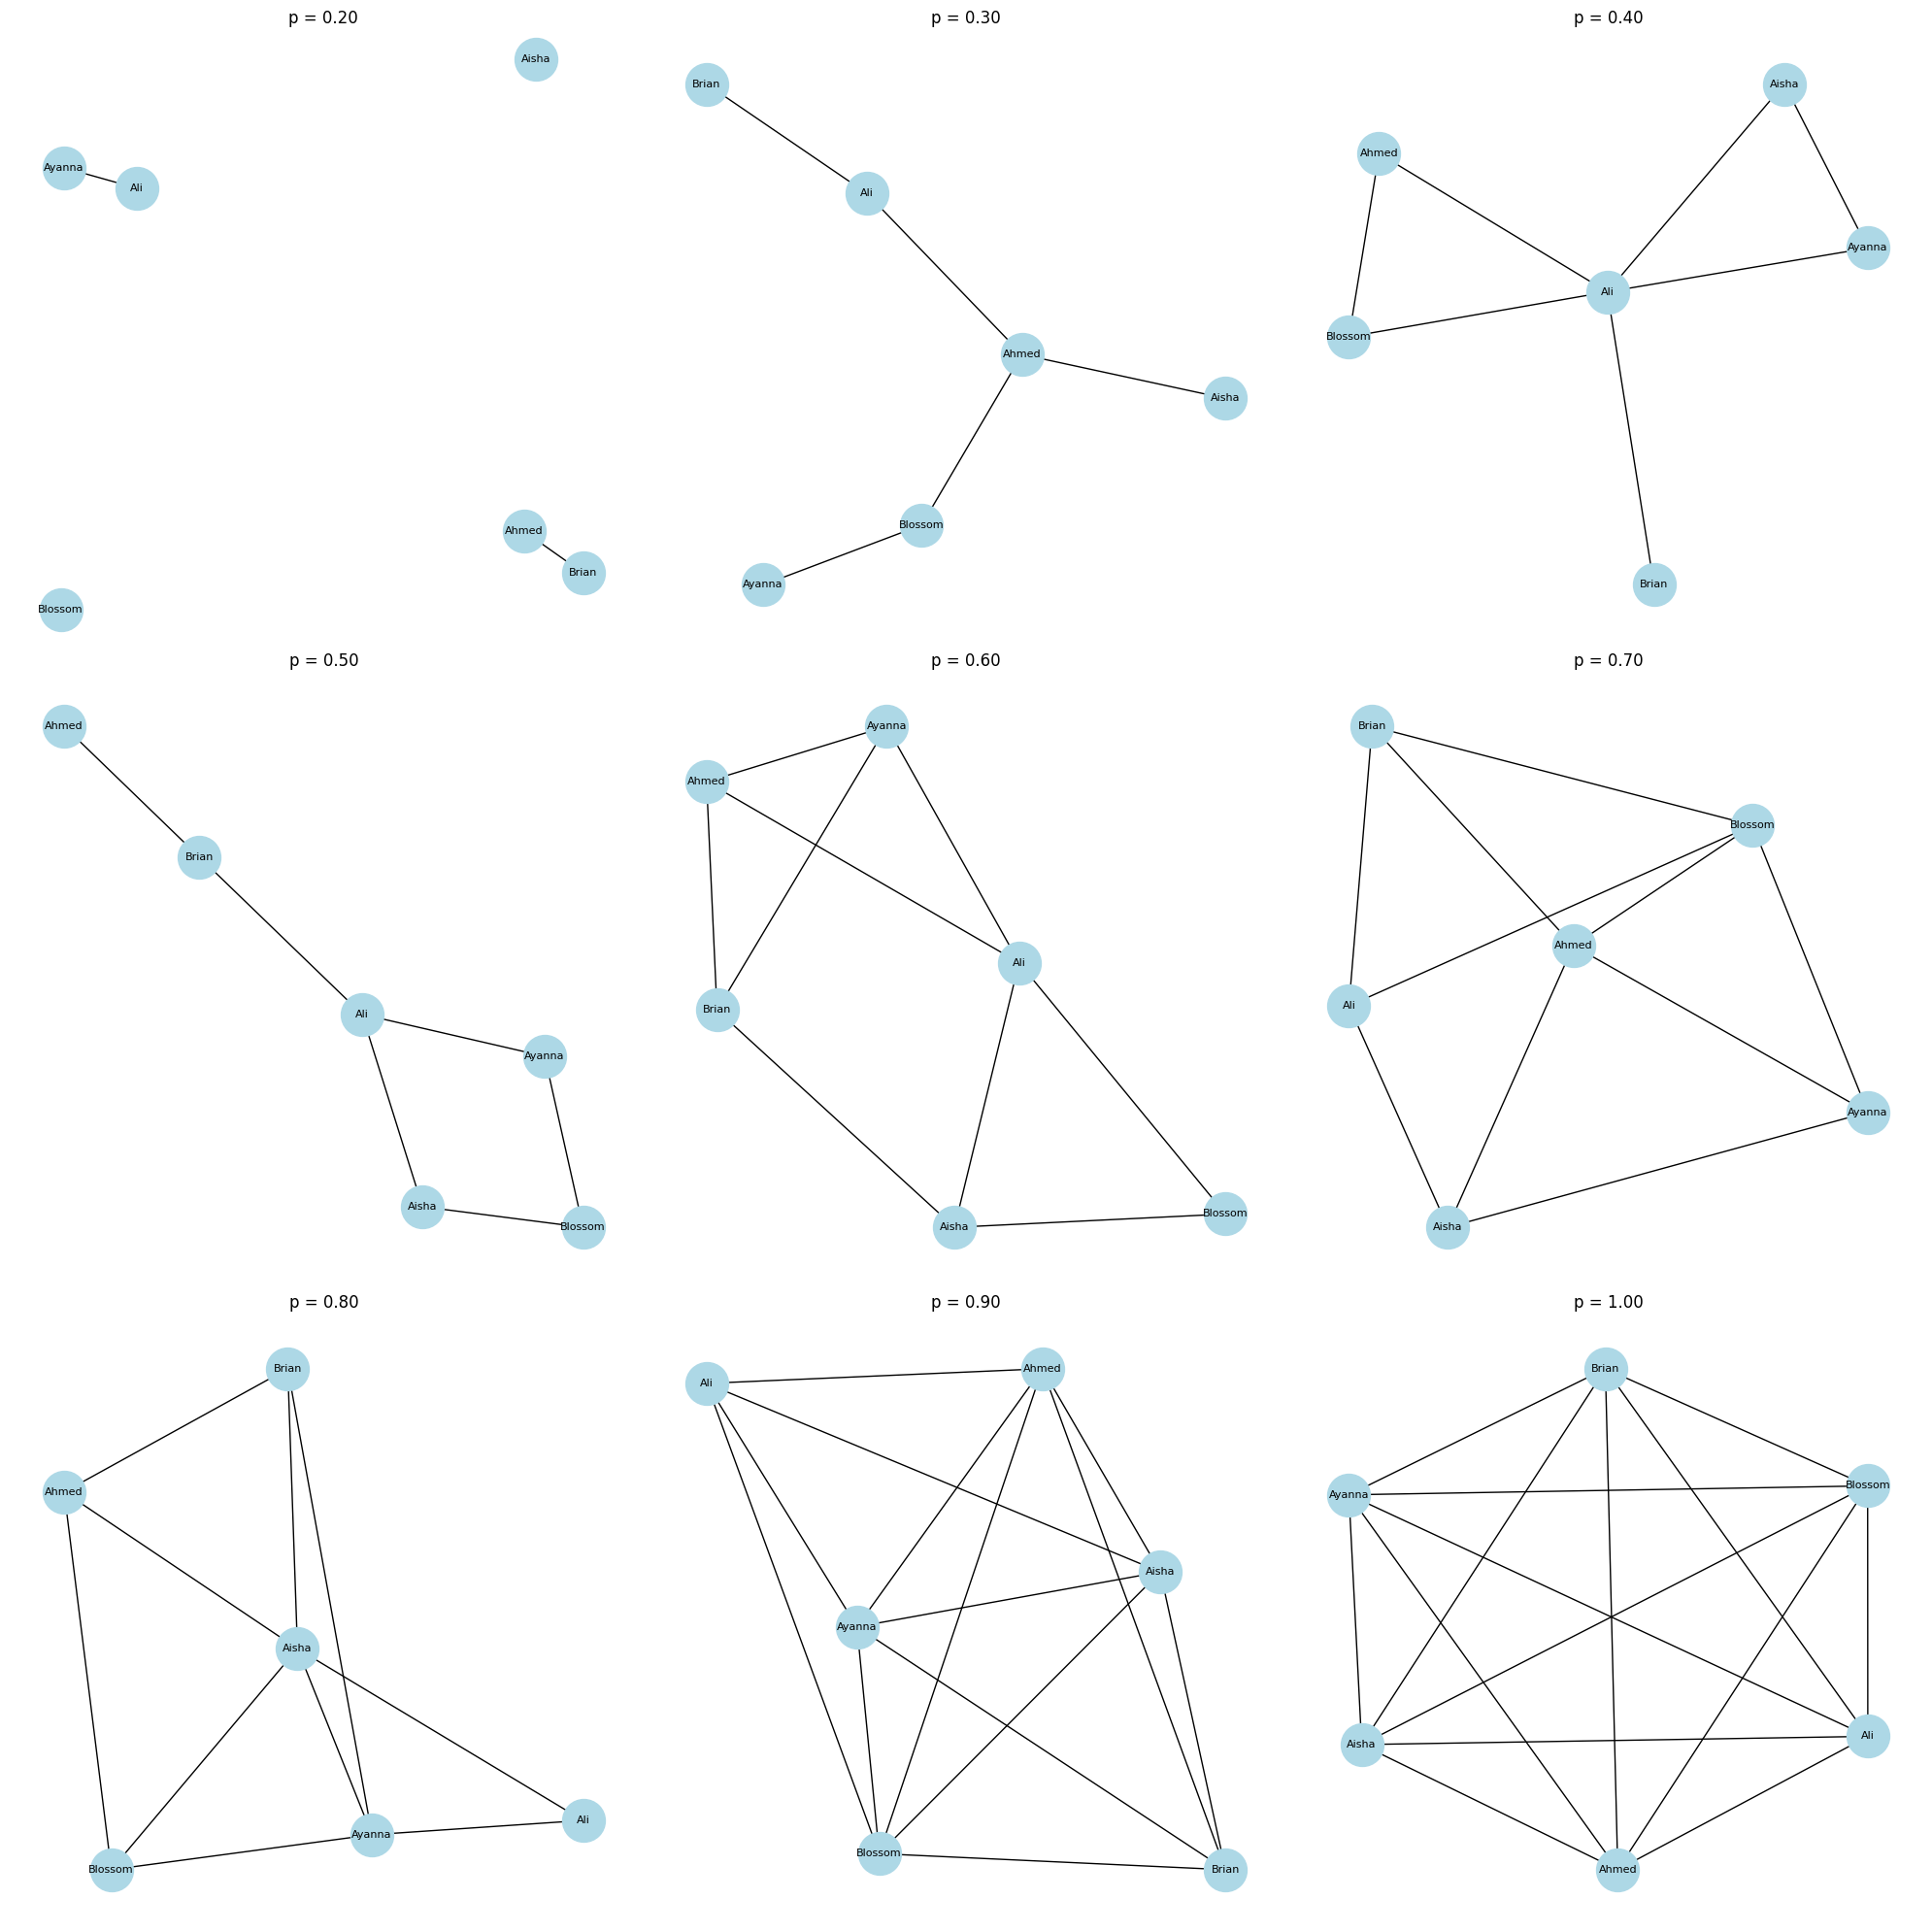

In [ ]:
''' As per professor - for yasmine we need to generate serveral networks
   each one a RD network.

    num_nodes and num_networks define the size of the RD networks
    in the paper its 300 networks in total, the networks each with 45
    nodes. -- this is to see if we are on the right path, and graphs
    that size just look like a mess, so I lowered the size so we can see
    the networks, so we can see that we are on the right path.

    [ Note there are also the task attributes, we havent addressed that yet.]

'''

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# global ps

def generate_er_networks(num_nodes, num_networks, names):
    global ps
    ps = np.linspace(0.2, 1.0, num_networks)
    networks = []
    for i, p in enumerate(ps):
        G = nx.erdos_renyi_graph(num_nodes, p)
        node_mapping = {i: name for i, name in enumerate(names)}
        G = nx.relabel_nodes(G, node_mapping)
        networks.append(G)
    return networks

def read_names_from_file(file_path):
    with open(file_path, 'r') as file:
        names = [name.rstrip('\n') for name in file.readlines()]
    return names

def plot_er_networks(networks):
    num_networks = len(networks)
    fig, axs = plt.subplots(3, 3, figsize=(20, 20))
    for i, ax in enumerate(axs.flat):
        if i < num_networks:
            nx.draw(networks[i], ax=ax, with_labels=True, node_color='lightblue', node_size=1000, font_size=8)
        ax.set_title(f"p = {ps[i]:.2f}")
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    plt.show()

# Example usage
num_nodes = 6  # Number of nodes in each network
num_networks = 9  # Number of networks to generate
names_file_path = 'names.txt'  # File path containing the names, one name per line

names = read_names_from_file(names_file_path)
er_networks = generate_er_networks(num_nodes, num_networks, names)
plot_er_networks(er_networks)


In [ ]:
# NOW that the networks are generated we want to put them in a form that we can
# make RDF's to put on the server. ( Main goal)
#
# the way we did before was to put that into a dictionary, so here
# we are working out how to convert from a networkx graph
# out to a dictionary
# the 'key' is the line with
#    nx.to_dict_of_dicts(n).items()
# which converts the network to a dictionary of dictionarys and then
# we can parse/dig through that and get all the data
## Print out the network as a list of people and their connections
for n in er_networks:
     print ('--------------------------------------------- ')
     print (n)
     # convert the networkx graph to a dictionary
     d = nx.to_dict_of_dicts(n).items()
     # pretty print out the dictionary
     for key,val in d:
            print (key," --- ", end='')
            for k in val:
                print (k, ", ", end = '')
            print("")

--------------------------------------------- 
Graph with 6 nodes and 2 edges
Ahmed  --- Brian , 
Aisha  --- 
Ali  --- Ayanna , 
Ayanna  --- Ali , 
Blossom  --- 
Brian  --- Ahmed , 
--------------------------------------------- 
Graph with 6 nodes and 5 edges
Ahmed  --- Aisha , Ali , Blossom , 
Aisha  --- Ahmed , 
Ali  --- Ahmed , Brian , 
Ayanna  --- Blossom , 
Blossom  --- Ahmed , Ayanna , 
Brian  --- Ali , 
--------------------------------------------- 
Graph with 6 nodes and 7 edges
Ahmed  --- Ali , Blossom , 
Aisha  --- Ali , Ayanna , 
Ali  --- Ahmed , Aisha , Ayanna , Blossom , Brian , 
Ayanna  --- Aisha , Ali , 
Blossom  --- Ahmed , Ali , 
Brian  --- Ali , 
--------------------------------------------- 
Graph with 6 nodes and 6 edges
Ahmed  --- Brian , 
Aisha  --- Ali , Blossom , 
Ali  --- Aisha , Ayanna , Brian , 
Ayanna  --- Ali , Blossom , 
Blossom  --- Aisha , Ayanna , 
Brian  --- Ahmed , Ali , 
--------------------------------------------- 
Graph with 6 nodes and 9 edges
Ah

In [ ]:
# an attempt to turn on wordwrap in Collab so things dont run off the screen
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)


In [ ]:
# a try at just pretty printing out the whole thing
import pprint
pp = pprint.PrettyPrinter(indent=4)
# d is the entire list of networks, converted to a dictionary
pp.pprint(d)

dict_items([('Ahmed', {'Aisha': {}, 'Ali': {}, 'Ayanna': {}, 'Blossom': {}, 'Brian': {}}), ('Aisha', {'Ahmed': {}, 'Ali': {}, 'Ayanna': {}, 'Blossom': {}, 'Brian': {}}), ('Ali', {'Ahmed': {}, 'Aisha': {}, 'Ayanna': {}, 'Blossom': {}, 'Brian': {}}), ('Ayanna', {'Ahmed': {}, 'Aisha': {}, 'Ali': {}, 'Blossom': {}, 'Brian': {}}), ('Blossom', {'Ahmed': {}, 'Aisha': {}, 'Ali': {}, 'Ayanna': {}, 'Brian': {}}), ('Brian', {'Ahmed': {}, 'Aisha': {}, 'Ali': {}, 'Ayanna': {}, 'Blossom': {}})])


In [ ]:
# Pretty print out the network
# and create a dictionary representing the network as well and print that out

all_networks = []
i = 0
for n in er_networks:
    friends = {}
    i = i + 1
    print ('--------------------------------------------- ')
    print (n)
    d = nx.to_dict_of_dicts(n).items()
    for key,val in d:
        print (key," --- ", end='')
        # create a new dictionary to hold a person as a key and the value as their list of friends
        friends[key] = []
        for k in val:
            print (k, ", ", end = '')
            # since friends value is a list of friends, append this new person to that list
            friends[key].append(k)
        print("")

print ("\n\n** Last network as a dictionary of friends **")
print (friends)

--------------------------------------------- 
Graph with 6 nodes and 2 edges
Ahmed  --- Brian , 
Aisha  --- 
Ali  --- Ayanna , 
Ayanna  --- Ali , 
Blossom  --- 
Brian  --- Ahmed , 
--------------------------------------------- 
Graph with 6 nodes and 5 edges
Ahmed  --- Aisha , Ali , Blossom , 
Aisha  --- Ahmed , 
Ali  --- Ahmed , Brian , 
Ayanna  --- Blossom , 
Blossom  --- Ahmed , Ayanna , 
Brian  --- Ali , 
--------------------------------------------- 
Graph with 6 nodes and 7 edges
Ahmed  --- Ali , Blossom , 
Aisha  --- Ali , Ayanna , 
Ali  --- Ahmed , Aisha , Ayanna , Blossom , Brian , 
Ayanna  --- Aisha , Ali , 
Blossom  --- Ahmed , Ali , 
Brian  --- Ali , 
--------------------------------------------- 
Graph with 6 nodes and 6 edges
Ahmed  --- Brian , 
Aisha  --- Ali , Blossom , 
Ali  --- Aisha , Ayanna , Brian , 
Ayanna  --- Ali , Blossom , 
Blossom  --- Aisha , Ayanna , 
Brian  --- Ahmed , Ali , 
--------------------------------------------- 
Graph with 6 nodes and 9 edges
Ah

In [ ]:
# Pretty print out the network
# and create a dictionary representing the network as well and print that out
# Put each of those dictionaries in to a list called all_networks
import pprint


all_networks = []
i = 0
for n in er_networks:
    friends = {}
    i = i + 1
    print ('--------------------------------------------- ')
    print (n)
    d = nx.to_dict_of_dicts(n).items()
    for key,val in d:
        print (key," --- ", end='')
        # create a new dictionary to hold a person as a key and the value as their list of friends
        friends[key] = []
        for k in val:
            print (k, ", ", end = '')
            # since friends value is a list of friends, append this new person to that list
            friends[key].append(k)
        print("")
    all_networks.append(friends)
print ("\n\n** Last network as a dictionary of friends **")
print (friends)
print ('----------------------------------------------------------------------------------')
print ('    This is a dictionary representation of all of the ER networks produced        ')
print ('----------------------------------------------------------------------------------')

pp.pprint (all_networks)

--------------------------------------------- 
Graph with 6 nodes and 2 edges
Ahmed  --- Brian , 
Aisha  --- 
Ali  --- Ayanna , 
Ayanna  --- Ali , 
Blossom  --- 
Brian  --- Ahmed , 
--------------------------------------------- 
Graph with 6 nodes and 5 edges
Ahmed  --- Aisha , Ali , Blossom , 
Aisha  --- Ahmed , 
Ali  --- Ahmed , Brian , 
Ayanna  --- Blossom , 
Blossom  --- Ahmed , Ayanna , 
Brian  --- Ali , 
--------------------------------------------- 
Graph with 6 nodes and 7 edges
Ahmed  --- Ali , Blossom , 
Aisha  --- Ali , Ayanna , 
Ali  --- Ahmed , Aisha , Ayanna , Blossom , Brian , 
Ayanna  --- Aisha , Ali , 
Blossom  --- Ahmed , Ali , 
Brian  --- Ali , 
--------------------------------------------- 
Graph with 6 nodes and 6 edges
Ahmed  --- Brian , 
Aisha  --- Ali , Blossom , 
Ali  --- Aisha , Ayanna , Brian , 
Ayanna  --- Ali , Blossom , 
Blossom  --- Aisha , Ayanna , 
Brian  --- Ahmed , Ali , 
--------------------------------------------- 
Graph with 6 nodes and 9 edges
Ah